In [9]:
# ========================
# !!! EXTRACT TEMPLATE !!!
# ========================

import gammalib
import ctools
import cscripts
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import sys
import string
import re

if_ebl = False

if if_ebl == True :
    workdir = '/home/ambra/Desktop/cluster-morgana/template_ebl_test/' 
    path = workdir + 'template_ebl/'
    datapath = path + 'data/'
    simpath = path + 'sim/'
    template = path + 'template_ebl.fits'
    model = path + 'template_ebl.xml'

    hdul =  fits.open(template)
    hdul.info()

    rootname ='template_ebl_test'
    pathout = datapath

    # 41 energybins [GeV] ---!
    energy=np.array(hdul[1].data)
    # 71 timebins [s] ---!
    time=np.array(hdul[2].data)
    # spectra no EBL ---!
    spectra=np.array(hdul[3].data)
    # spectra with EBL ---!
    ebl=np.array(hdul[4].data)
    
else :
    workdir = '/home/ambra/Desktop/cluster-morgana/run0406_plots/run0406/' 
    path = workdir + 'run0406_ID000126/'
    datapath = path + 'data/'
    simpath = path + 'sim/'
    template = workdir + 'run0406_ID000126.fits'
    model = workdir + 'run0406_ID000126.xml'

    hdul =  fits.open(template)
    hdul.info()

    rootname ='template_ebl_test'
    pathout = datapath

    # 41 energybins [GeV] ---!
    energy=np.array(hdul[1].data)
    # 71 timebins [s] ---!
    time=np.array(hdul[2].data)
    # spectra no EBL ---!
    spectra=np.array(hdul[3].data)


Nt=len(time)
Ne=len(energy)

primary = hdul[0].header
trueRA = primary['RA']
trueDEC = primary['DEC']

print(trueRA, trueDEC)

# TIME GRID ---!
t=[0.0 for x in range(Nt+1)]
for i in range(Nt-1):
    t[i+1]=time[i][0]+(time[i+1][0]-time[i][0])/2
# tmax bin ---!
t[Nt]=time[Nt-1][0]+(time[Nt-1][0]-t[Nt-1])

print('time bins')
#print(time)

# ENERGY GRID ---!
en=[1.0 for x in range(Ne+1)]
for i in range(Ne-1):
    en[i+1]=energy[i][0]+(energy[i+1][0]-energy[i][0])/2
# emax bin ---!
en[Ne]=energy[Ne-1][0]+(energy[Ne-1][0]-en[Ne-1])

print('energy GeV bins')
#print(energy, i)

Filename: /home/ambra/Desktop/cluster-morgana/run0406_plots/run0406/run0406_ID000126.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  ENERGIES      1 BinTableHDU     13   41R x 1C   [E]   
  2  TIMES         1 BinTableHDU     13   71R x 1C   [E]   
  3  SPECTRA       1 BinTableHDU     92   71R x 41C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
33.057 -51.841
time bins
energy GeV bins


In [10]:
# ========================
# !!! EXTRACT SPECTRUM !!!
# ========================

# EBL ---!
if if_ebl==True :
    for i in range(Nt):
        filename=pathout+'spec_ebl_tbin'+str(i)+'.out'

        if os.path.isfile(filename):
            os.system('rm '+filename)
        os.system('touch '+filename)
        out_file = open(filename,'a')
    #        out_file.write("E[MeV],Flux[fotoni/MeV/cm^2/s]"+"\n")
        out_file.close()

    for i in range(Nt):
        outfile=pathout+'spec_ebl_tbin'+str(i)+'.out'  
        out_file = open(outfile,'a')
        for j in range(Ne):
#            print (energy[j][0], '[GeV]', spectra[j][i], '[ph/cm2/s/GeV]')  
#            write spectral data in E [MeV] and I [ph/cm2/s/MeV]
            out_file.write(str(energy[j][0]*1000.0)+' '+str(ebl[j][i]/1000.0)+"\n")
        out_file.close()

        os.system('cp '+model+' '+pathout+'template_ebl_tbin'+str(i)+'.xml')  
        s = open(pathout+'template_ebl_tbin'+str(i)+'.xml').read() 
        s = s.replace('data/spec_ebl','spec_ebl_tbin'+str(i))  
        f = open(pathout+'template_ebl_tbin'+str(i)+'.xml','w') 
        f.write(s)
        f.close()
    print('done ebl')
# NO EBL ---!
else :
    # create Nt ascii files containing spectral information ---!
    for i in range(Nt):
        filename=pathout+'spec_tbin'+str(i)+'.out'
#        print(filename)

        if os.path.isfile(filename):
            os.system('rm '+filename)
        os.system('touch '+filename)
        out_file = open(filename,'a')
#        out_file.write("E[MeV],Flux[fotoni/MeV/cm^2/s]"+"\n")
        out_file.close()

    
    for i in range(Nt):
        outfile=pathout+'spec_tbin'+str(i)+'.out'
        out_file = open(outfile,'a')
        for j in range(Ne):
#            print (energy[j][0], '[GeV]', spectra[i][j], '[ph/cm2/s/GeV]')
#            write spectral data in E [MeV] and I [ph/cm2/s/MeV]
            out_file.write(str(energy[j][0]*1000.0)+' '+str(spectra[i][j]/1000.0)+"\n")
        out_file.close()

        os.system('cp '+model+' '+pathout+'run0406_ID000126_tbin'+str(i)+'.xml')
        s = open(pathout+'run0406_ID000126_tbin'+str(i)+'.xml').read()
        s = s.replace('data/spec','spec_tbin'+str(i))
        f = open(pathout+'run0406_ID000126_tbin'+str(i)+'.xml','w')
        f.write(s)
        f.close()  
    print('done')

done


t 30 26 150 33
e 30.0 16 500.0 28
33


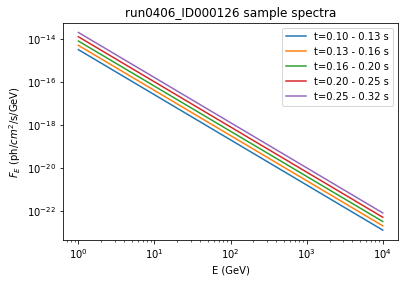

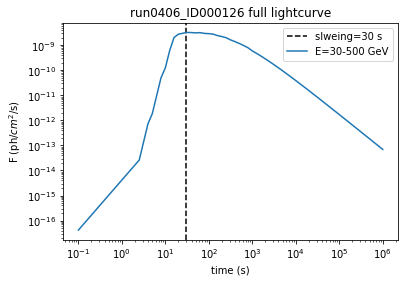

In [11]:
# =====================
# !!! PLOT TEMPLATE !!!
# =====================

import matplotlib.pyplot as plt

log_lc = True
int_f = True
max_t = False

slew=30 # in s
tmax = 150 # in s
tbin_stop = 0
tbin_start= 0
texp = [1,5,10,100]
colors=['r', 'g', 'm', 'y']
# stop the second after higher tmax ---!
for i in range(len(t)) :
    if t[i] <= slew :
        tbin_start += 1
#        print(i, t[i])
    elif t[i] <= tmax and t[i] >= slew :
        tbin_stop = i+1
#        print(i, t[i])
    else :
        continue

print('t', slew, tbin_start, tmax, tbin_stop)

emin = 0.03*1e3 # in GeV
emax = 0.5*1e3 # in GeV
# stop the second after higher tmax ---!
ebin_stop = 0
ebin_start = 0
for i in range(len(en)) :
    if en[i] <= emin :
        ebin_start += 1
#        print(i, en[i])
    elif en[i] <= emax and en[i] >= emin :
        ebin_stop = i+1
#        print(i, en[i])
    else :
        continue

print('e', emin, ebin_start, emax, ebin_stop)


# NEW TIME GRID ---!
en=[1.0 for x in range(Ne+1)]
for i in range(Ne-1):
    en[i+1]=energy[i][0]+(energy[i+1][0]-energy[i][0])/2
# tmax bin ---!
en[Ne]=energy[Ne-1][0]+(energy[Ne-1][0]-en[Ne-1])

# FLUX WITHIN EACH TIME BIN ---!
if int_f == False and max_t == False :
    f=[0.0 for x in range(Nt)]
    for i in range(Nt):
        f[i]=0
        for j in range(Ne):
            # EBL ---!
            if if_ebl==True :
                f[i]=f[i]+ebl[j][i]*(en[j+1]-en[j])
            # NO EBL ---!
            else :
                f[i]=f[i]+spectra[i][j]*(en[j+1]-en[j])
                
elif int_f == False and max_t == True :
    f=[0.0 for x in range(tbin_stop)]
    for i in range(tbin_stop):
        f[i]=0
        for j in range(Ne):
            # EBL ---!
            if if_ebl==True :
                f[i]=f[i]+ebl[j][i]*(en[j+1]-en[j])
            # NO EBL ---!
            else :
                f[i]=f[i]+spectra[i][j]*(en[j+1]-en[j])   
                
elif int_f == True and max_t == False :
    ebins = ebin_stop-ebin_start
    f=[0.0 for x in range(Nt)]
    for i in range(Nt) :
        f[i]=0
        k = ebin_start
#        h = tbin_start
        for j in range(ebins):
            k += 1
            #EBL ---!
            if if_ebl==True :
                f[i]=f[i]+ebl[k][i]*(en[k+1]-en[k])
            # NO EBL ---!
            else :
                f[i]=f[i]+spectra[i][k]*(en[k+1]-en[k])
                
else :
    tbins = tbin_stop-tbin_start
    ebins = ebin_stop-ebin_start
    f=[0.0 for x in range(tbin_stop)]
    for i in range(tbin_stop) :
        f[i]=0
        k = ebin_start
#        h = tbin_start
        for j in range(ebins):
            k += 1
            #EBL ---!
            if if_ebl==True :
                f[i]=f[i]+ebl[k][i]*(en[k+1]-en[k])
            # NO EBL ---!
            else :
                f[i]=f[i]+spectra[i][k]*(en[k+1]-en[k])

                
# Plot degli spettri nei primi N bin temporali:
N=5
f1=plt.figure()
for i in range(N):
    x=[]
    y=[]
    for j in range(Ne):
        x.append(energy[j][0])
        if if_ebl==True :
            y.append(ebl[j][i])
            plt.savefig('template_spectra_ebl.png')
            plt.title('template ebl sample')
        else :
            y.append(spectra[i][j])
            plt.savefig('template_spectra.png')
            plt.title('run0406_ID000126 sample spectra')
    plt.loglog(x,y, label='t=%.2f - %.2f s' %(time[i][0], time[i+1][0]))
    plt.xlabel('E (GeV)')
    plt.ylabel('$F_E$ (ph/$cm^2$/s/GeV)')
    plt.legend()
f1.figure


# PLOTTA LA CURVA DI LUCE
f2=plt.figure()
if log_lc == False :
    ax = plt.subplot(111, yscale='log', xscale='linear')
    plt.ylim([1e-12, 1e-8])
    suffix = 'lin'
    for i in range(len(texp)) :
        plt.axvline(slew+texp[i], c=colors[i], ls='-.', label='texp=%d s' %texp[i])
else :
    ax = plt.subplot(111, yscale='log', xscale='log')
    suffix = 'log'
    
if max_t == False :
    suffix2 = 'All'
else :
    suffix2 = ''

ax = plt.axvline(slew, c='k', ls='--', label='slweing=%d s' %slew)
#ax = plt.axvline(tmax, c='r', ls='--', label='tmax=%ds' %tmax) if int_f == True else None
    
if max_t == True :
    plt.plot(time[:tbin_stop],f, label='E=%d-%d GeV, t=%d-%d s' %(emin, emax, slew, tmax))
else: 
    plt.plot(time,f, label='E=%d-%d GeV' %(emin, emax))    
plt.xlabel('time (s)')
plt.ylabel('F (ph/$cm^2$/s)')

if if_ebl==True :
    plt.title('template')
    figname = 'template_ebl_lightcurve_%ds_%s.png' %(tmax, suffix+suffix2)
else :
    plt.title('run0406_ID000126 full lightcurve')
    figname = 'template_lightcurve_%ds_%s.png' %(tmax, suffix+suffix2)

plt.legend()
plt.savefig(figname)
f2.figure

print(tbin_stop)

In [13]:
from module_xml import *
from module_analysis import *
#from module_plot import *

count=1
fileroot = 'run0406_'
f = fileroot + 'sim%06d' % (count)

# ctools/cscripts parameters ---!
caldb = 'prod3b'
irf = 'South_z40_average_100s'

sigma = 5  # detection acceptance (Gaussian)
texp = [1, 5, 10, 100]  # exposure times (s) 
texp.sort()
tint = len(texp) 
tmin = 30  # slewing time (s)
tmax = []
for i in range(tint):
    tmax.append(tmin + texp[i])

elow = 0.03  # simulation minimum energy (TeV)
ehigh = 1.0  # simulation maximum energy (TeV)
emin = 0.03  # selection minimum energy (TeV)
emax = 0.5  # selection maximum energy (TeV)
roi = 5  # region of interest for simulation and selection (deg)
wbin = 0.02  # skymap bin width (deg)
nbin = int(roi/wbin)  # skymap x,y axes (pixel)
confidence = (0.68, 0.95, 0.9973)  # confidence interval for asymmetrical errors (%)

# pointing with off-axis equal to max prob GW ---!
offmax = (-1.475, -1.371)  # (deg)
trueRa = 33.057  # (deg)
trueDec = -51.841  # (deg)
pointRA = trueRa + offmax[0] # (deg)
pointDEC = trueDec + offmax[1] # (deg)

# ======================
# !!! GRB SIMULATION !!!
# ======================

# simulate ---!

event_bins = []
for i in range(tbin_stop):
    model = model
    event = simpath + f + "_tbin%02d.fits" % i
    event_bins.append(event)
    if not os.path.isfile(event) :
          simulate_event(model=model, event=event, 
                         t=[t[i], t[1+i]], tbin_stop=tbin_stop, e=[elow, ehigh], 
                         caldb=caldb, irf=irf, pointing=[pointRA, pointDEC], seed=count) 

# observation list ---!
eventList = simpath + 'obs_%s.xml' % f
if not os.path.isfile(eventList) :
    observation_list(event=event_bins, eventList=eventList, obsname=f, tbin_stop=tbin_stop) 

# ============================
# !!! EVENT LIST SELECTION !!!
# ============================

selectedEvents = []

for i in range(tint) :
    selectedEvents.append(eventList.replace(simpath, selectpath).replace('obs_', 'texp%ds_' % texp[i]))
    prefix = selectpath + 'texp%ds_' % texp[i]
    if not os.path.isfile(selectedEvents[i]) :
        select_event(eventList=eventList, event_selected=selectedEvents[i], 
                     prefix=prefix, t=[tmin, tmax[i]], e=[emin, emax])   

print('!!! check --- selection: ', selectedEvents)

os.system('python ./cta_scripts/cta_obs.py '+eventList)

# ========================
# !!! SELECTION SKYMAP !!!
# ========================

skymapName = []

for i in range(tint) :
    skymapName.append(selectedEvents[i].replace(selectpath, detpath).replace('.xml', '_skymap.fits'))
    if not os.path.isfile(skymapName[i]) :
        skymap_event(event_selected=selectedEvents[i], sky=skymapName[i], e=[emin, emax], 
                     caldb=caldb, irf=irf, wbin=wbin, nbin=nbin)

print('!!! check --- skymaps: ', skymapName)

# ==============================
# !!! DETECTION AND MODELING !!!
# ==============================

detXml = []
detReg = []
pos = []

for i in range(tint) :
    det, reg, coord = srcDetection_spcModeling(skymapName[i], sigma=sigma, maxSrc=1)
    detXml.append(det)
    detReg.append(reg)
    pos.append(coord)

print('\n\n==========\n\n!!! check --- detection.............', texp[i],
      's done\n\n!!! coords:', pos, '\n\n ==========\n\n')

showSkymap(skymap, reg='none', col='black', suffix='none', title='none', show=True)

RuntimeError: *** ERROR in GCsv::load(GFilename&, std::string&): File "data/spec.out" not found.

In [6]:
sys.executable

'/home/ambra/anaconda3/bin/python'

In [7]:
 sys.path

['',
 '/usr/local/gamma/lib/python3.6/site-packages',
 '/home/ambra/anaconda3/lib/python36.zip',
 '/home/ambra/anaconda3/lib/python3.6',
 '/home/ambra/anaconda3/lib/python3.6/lib-dynload',
 '/home/ambra/anaconda3/lib/python3.6/site-packages',
 '/home/ambra/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/home/ambra/.ipython']